## Tarea 3 (comportamiento del tiempo de toma de datos)

Haga cambios en el programa EjemTransfFourier.m para que con la misma señal, mismo periodo de muestreo, en vez de guardar en el vector de datos 1 segundo ahora se graben 5 segundos y luego 10 segundos. 

Haga un reporte con los resultados de los dos experimentos anteriores donde muestre las gráficas de la señal y la gráfica de la transformada de Fourier, revise en esta última en que frecuencia se localizan los picos y conteste a la pregunta ¿tiene sentido la frecuencia a la que se encuentran los picos? Como podrá comprobar, los picos están a la frec de 1 Hz, no importa cuanto tiempo se grabe de información.

Si la frecuencia no cambia entre picos, ¿que diferencia hay entre la transformada de Fourier de la señal que se grabó solo un segundo, de la que se grabaron 5 segundos y de la que se grabaron 10 segundos? En otras palabras, ¿que se gana con grabar más tiempo?

Entreguen un pequeño documento en PDF con los resultados y las respuestas 

Sugerencia, analice el vector vfrec, note que su longitud es la misma que el vector de datos pero que la frecuencia máxima es de 500, ¿entonces qué cambió? es muy importante que descubra la diferencia.

In [45]:
%matplotlib inline
from numpy.fft import fft,fftshift,ifftshift
from numpy import arange,cos,abs,angle,pi,floor
import matplotlib.pyplot as plt

## Parámetro para el muestreo de los datos en el dominio del tiempo

In [46]:
T_muestreo = 0.001 # Periodo de muestreo
t_grabacion = 10 # Tiempo total de grabacion de datos (segundos)
# Formamos un array que va desde 0 a t_grabacion-Tmuestreo con incrementos de T_muestreo
t = arange(0,t_grabacion,T_muestreo)

## Construyendo señal a analizar

Se tratará una señal cosenoidal de amplitud 1 y frecuencia 2 Hz

In [47]:
frecSenal = 1   # Queremos un coseno de 1 Hz de frecuencia
A = 1   # Queremos que el coseno sea de amplitud 1
w = 2*pi*frecSenal  # Frecuencia angular
senal = A*cos(w*t)    # Construimos la señal coseniodal de amplitud 1 y frecuencia 1 Hz 

## Graficando la señal original

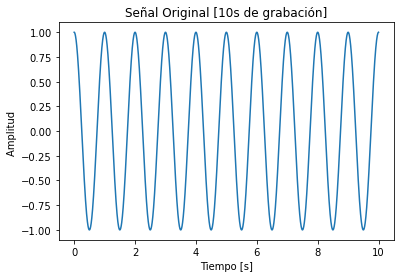

In [48]:
plt.plot(t,senal)
plt.title("Señal Original [10s de grabación]")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud ")
plt.savefig("Grabacion_10s_signal.png")

## Calculando la transformada de Fourier

In [49]:
fft_senal = fft(senal)

## Definición de función para correr la señal

#### Parámetros:
datos: array de la señal original
T_muestreo: Periodo de muestreo de los datos
#### Retorna:
vfreq: un array con los elementos ordenados comenzando con los valores negativos pasando por 0 hasta los positivos para poder interpretar mejor la fft

In [50]:
def calcVecFrec(datos,PeriodoMuestreo):
    #Esta funcion calcula el vector de los valores de la frecuencia (en Hz) en el
    #espacio de Fourier de una secuencia guardada en el vector datos,
    #PeriodoMuest, es el tiempo transcurrido entre medición y medición
    N = len(datos) # Calculamos la longitud de los datos
    TiempoCompleto=PeriodoMuestreo*N #Calculamos el tiempo total (de medición) de la señal
    #Verificamos si la cantidad de datos es par o impar
    if(N%2 == 0):
        # Construímos un vector que va de -int(N/2) hasta int(N/2)-1 en incrementos de 1 en 1
        vfreq = arange(-floor(N/2),floor(N/2),1)
    else:
        # Construimos un vector que va de -int(N/2) hasta int(N/2) en incrementos de 1
        vfreq = arange(-floor(N/2),floor(N/2)+1,1)
    # Hasta este punto las unidades de vfreq serán (repeticiones)
    # Queremos convertirlas a Hz como en el caso de la fft, así que dividiremos
    # entre el tiempo completo de medicion
    vfreq /= TiempoCompleto # Aqui las unidades son Hertz
    # Corremos el arreglo de tal forma que quede identico a la parte del dominio de la gráfica de
    # la transformada de fourier

    # Lo que hace ifffshift es correr un arreglo hacia la izquierda por ejemplo:
    # si vfreq = [-2,-1,0,1,2] ---> [-1,0,1,2,-2] ---> [0,1,2,-2,-1]
    vfreq = ifftshift(vfreq) # Corremos el arreglo
    return vfreq

## Creamos un array con exactamente los mismos valores del dominio en la frecuencia de la transfromada de fourier

In [51]:
vfreq = calcVecFrec(datos=senal,PeriodoMuestreo=T_muestreo)

## Graficando la FFT 

Notese que estamos corriendo nuevaente la fft tanto en dominiio (vfreq) como en sus valores (abs(FFTsenal))

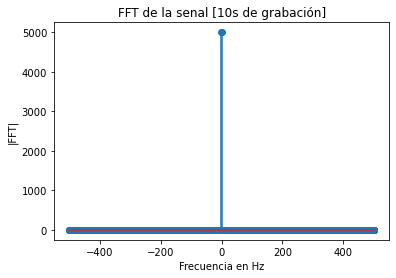

In [52]:

plt.stem(fftshift(vfreq),abs(fftshift(fft_senal)))
plt.title("FFT de la senal [10s de grabación]")
plt.xlabel('Frecuencia en Hz')
plt.ylabel('|FFT|')
plt.savefig("Grabacion_10s_FFT_signal.png")

## Aunque parece que solo hay un contribución, observe que...

## Normalizando la magnitud de la FFT

Dado que en la grafica de la FFT (magnitud) cuando sumamos todas las contribuciones, nos da el número total de datos, es decir, la longitud del array de la FFT, podemos normalizar (para interpretar, necesitamos decir cuales son las unidades de FFT) a 1, dividiendo entre la cantidad de datos, así, la suma de todas las contribuciones dara siempre 1.

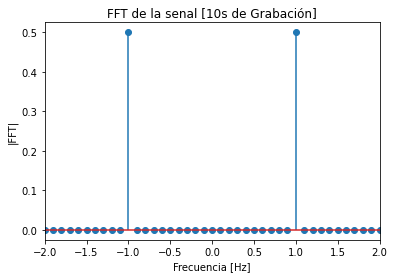

In [54]:
plt.stem(fftshift(vfreq),abs(fftshift(fft_senal))/len(fft_senal))
plt.title("FFT de la senal [10s de Grabación]")
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('|FFT|')
plt.xlim([-2,2])
plt.savefig("Grabacion_10s_FFT_signal_amp.png")

La principal diferencia entre el tiempo de grabación de 1 y 5 segundos es la resolución en el espacio de las frecuencias, antes se mapeaban de 1 en 1, ahora, de 0.2 en 0.2, cuando aumentamos el tiempo de grabación a 10s, entonces, la resolución en el espacio de las frecuencias también aumenta, ahora se mapean en incrementos de 0.1 

In [55]:
print(f"{len(t)} \t {len(vfreq)}")

10000 	 10000
